# Deep Learning Tutorial

(C) 2019-2024 by [Damir Cavar](http://damir.cavar.me/)

This notebook was inspired by numerous totorials and other notebooks online, and books like Weidman (2019), ...

**Prerequisites:**

In [ ]:
!pip install -U numpy

In [ ]:
!pip install -U matplotlib

## General Conventions

In the following Python code I will make use of type hints for Python to make explicit the variable and return types of all the functions used. This is supposed to make the code semantics more transparent.

In [16]:
from typing import Callable

## Our Core Python Libraries

We will make use of the scientific computing package *[numpy](https://numpy.org/)* in this notebook. In the following cell we import *[numpy](https://numpy.org/)* and refer to it as *np*: 

In [17]:
import numpy as np

We will need the *[ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)* object from *[numpy](https://numpy.org/)*. By importing it directly here, we intend to simplify and reduce the code in the following:

In [18]:
from numpy import ndarray

Some of the functions that we will need to use will be plotted. We use the *pyplot* library from the *matplotlib*, refering to it as *plt*.

In [19]:
from matplotlib import pyplot as plt

## Activation Functions

The following function is taken from Weidman (2019):

In [20]:
def leaky_relu(x: ndarray) -> ndarray:
    """
    Apply Leaky ReLU to each element in ndarray.
    """
    return np.maximum(0.2 * x, x)

We can plot the Leaky ReLU function as follows:

Text(0, 0.5, 'y')

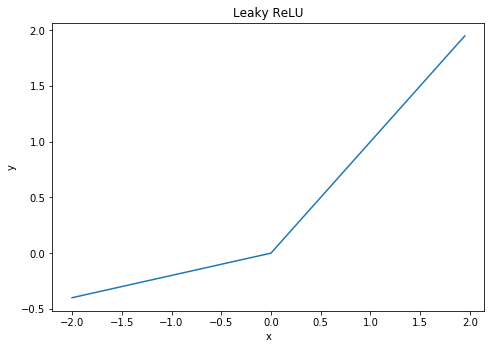

In [21]:
%matplotlib inline
x = np.arange(-2, 2, 0.05)
y = leaky_relu(x)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y)
ax.set_title("Leaky ReLU")
ax.set_xlabel("x")
ax.set_ylabel("y")

We can reformulate the ReLU function as a special variant of the *numpy.clip* function, applied here to the *nparray* x: 

Text(0, 0.5, 'y')

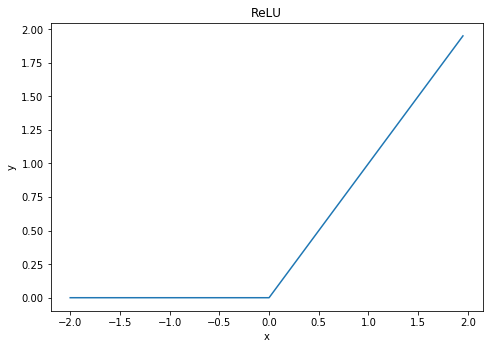

In [8]:
%matplotlib inline
x = np.arange(-2, 2, 0.05)
y = x.clip(min=0)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y)
ax.set_title("ReLU")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [9]:
def deriv(func : Callable[[ndarray], ndarray],
         input_ : ndarray,
         delta : float = 0.001) -> ndarray:
    """
    Evaluates the derivative of a function 'func' at every element in the 'input_' array.
    """
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

# Derivatives

Derivatives are the amount of change of the result of a function when changing the input slightly at a certain value *a*.

$$\frac{df}{du}(a) = \lim_{\Delta \rightarrow 0} \frac{f(a + \Delta) - f(a - \Delta)}{2 \times \Delta}$$

To approximate the limit, we can set a very small value for $\Delta$:

$$\frac{df}{du}(a) = \frac{f(a + 0.001) - f(a - 0.001)}{2 \times 0.001} = \frac{f(a + 0.001) - f(a - 0.001)}{0.002}$$

We can simplify this equation to optimize the computation by taking $\Delta = 0.001$ only once into account:

$$\frac{df}{du}(a) = \frac{f(a + 0.001) - f(a)}{0.001}$$

This is in fact the slope of the function *f(x)* at point *a*, represented in the following by the tangent (red line):

Text(0, 0.5, 'y')

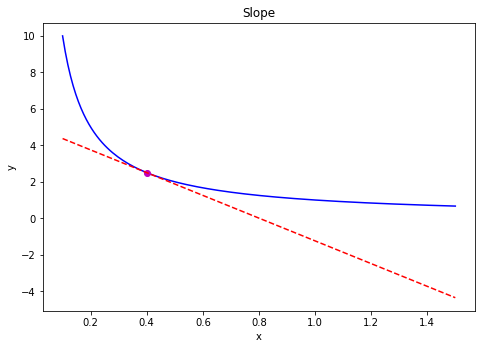

In [10]:
%matplotlib inline
def f(x):
 return 1/x

x = np.linspace(0.1,1.5,150)
y = f(x)

a = .4
h = 0.001
fprime = (f(a + h) - f(a)) / h   # derivative
tan = f(a) + fprime * (x - a)  # tangent

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, 'b', a, f(a), 'om', x, tan, '--r')
ax.set_title("Slope")
ax.set_xlabel("x")
ax.set_ylabel("y")

A simplified derivative function could be formulated as follows:

In [11]:
def deriv(func: Callable[[ndarray], ndarray],
         input_: ndarray,
         delta: float = 0.001) -> ndarray:
    """
    Computes the derivate of func for every value in the input array.
    """
    return (func(input_ + delta) - func(input_)) / delta

## Softmax

$$softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^d}\mbox{ with } 1 \leq i \geq d$$

We can define the *softmax* function as follows:

In [22]:
def softmax(x: ndarray) -> ndarray:
    """
    Compute softmax values for each sets of scores in x.
    """
    return np.exp(x) / np.sum(np.exp(x), axis=0)

The following example shows the effect:

In [23]:
scores = [3.0, 1.0, 0.2]
softmaxscores = softmax(scores)
print("Softmax:", softmaxscores, "\tSum:", sum(softmaxscores))

Softmax: [0.8360188  0.11314284 0.05083836] 	Sum: 0.9999999999999999
